In [156]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
inputDF = pd.read_csv("ny_listing_2018.csv.gz")


# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.info()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33600 entries, 0 to 49037
Data columns (total 96 columns):
id                                  33600 non-null int64
listing_url                         33600 non-null object
scrape_id                           33600 non-null int64
last_scraped                        33600 non-null object
name                                33600 non-null object
summary                             33600 non-null object
space                               33600 non-null object
description                         33600 non-null object
experiences_offered                 33600 non-null object
neighborhood_overview               33600 non-null object
notes                               33600 non-null object
transit                             33600 non-null object
access                              33600 non-null object
interaction                         33600 non-null object
house_rules                         33600 non-null object
thumbnail_url          

In [157]:
# Categorizing differernt listings based on room_type

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,16903
1,Private room,15966
2,Shared room,731


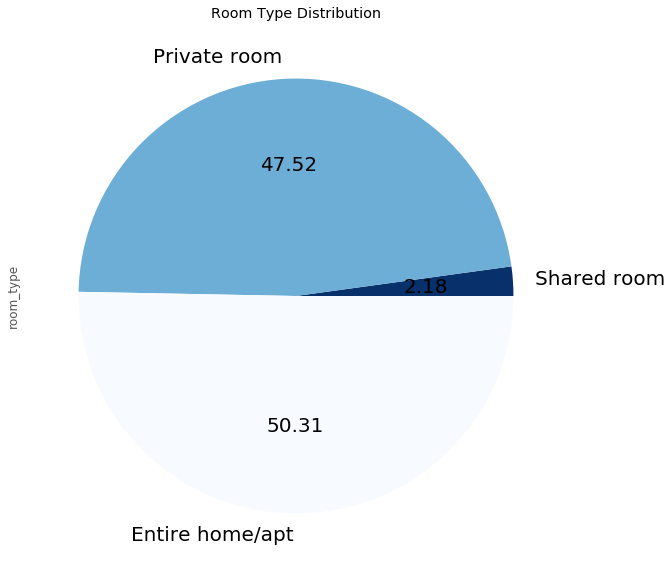

In [158]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0, 0.5, 'Number of listings')

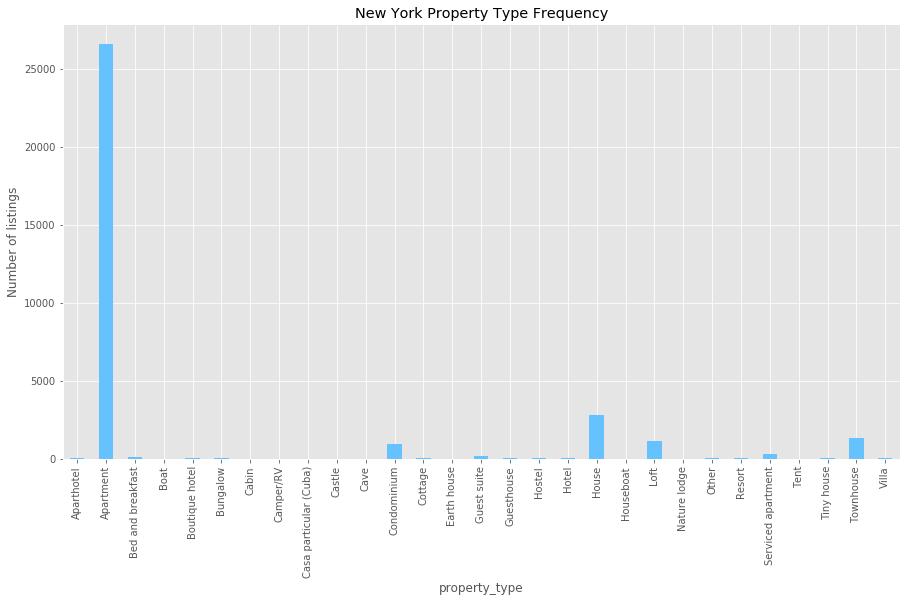

In [167]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'New York Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [160]:
# analyzing the prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
31,Hotel,Entire home/apt,1100.000000
45,Resort,Private room,614.095238
49,Tent,Entire home/apt,550.000000
36,Houseboat,Entire home/apt,500.000000
44,Resort,Entire home/apt,436.800000


In [161]:
# Average prices for each type of listing

avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

,room_type,average_Price
0,Entire home/apt,207.184583
1,Private room,82.712827
2,Shared room,64.050616


In [162]:
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_group_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_group_cleansed,Number_Of_Listings
2,Manhattan,8196
1,Brooklyn,6988
3,Queens,1413
0,Bronx,202
4,Staten Island,104


In [163]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_group_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_group_cleansed,Average_Price
2,Manhattan,247.183260
1,Brooklyn,177.147109
3,Queens,142.453645
4,Staten Island,135.634615
0,Bronx,113.019802


In [164]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_group_cleansed')
mergeDF.head()

,neighbourhood_group_cleansed,Number_Of_Listings,Average_Price
0,Manhattan,8196,247.183260
1,Brooklyn,6988,177.147109
2,Queens,1413,142.453645
3,Bronx,202,113.019802
4,Staten Island,104,135.634615


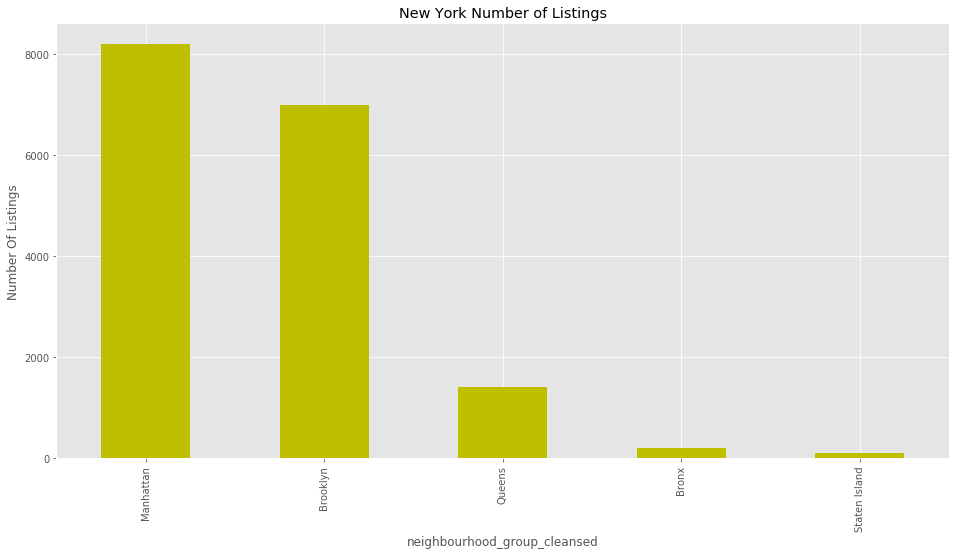

In [168]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment

objects = neighbourhood_DF['neighbourhood_group_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_group_cleansed',
           y='Number_Of_Listings',
           color = 'y', 
           figsize =(16,8), 
           title = 'New York Number of Listings', 
           legend = False)

plt.ylabel('Number Of Listings')
plt.locator_params(nbins=5)

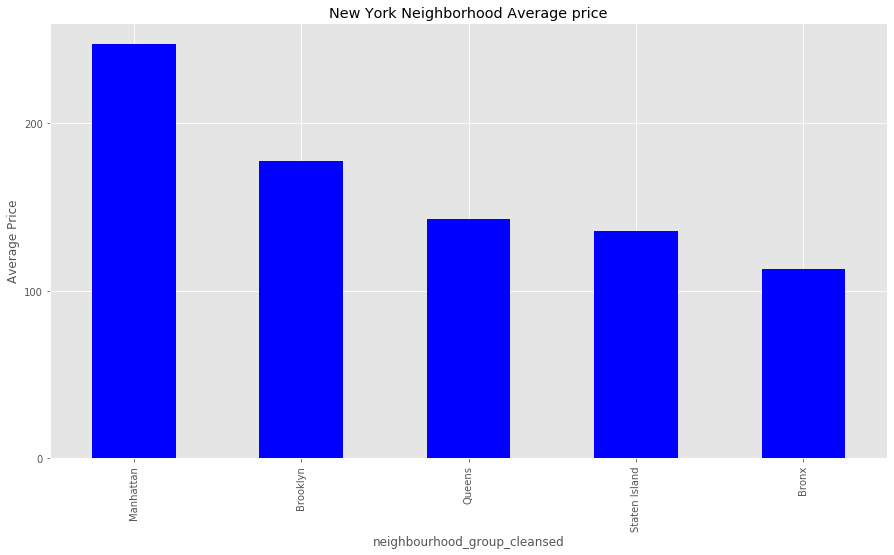

In [169]:
# visualize average price of these listings on the basis of neighbourhood where room type is entire apartment

objects = neighbourhoodPrice_DF['neighbourhood_group_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_group_cleansed',
           y='Average_Price',
           color = 'b', 
           figsize =(15,8), 
           title = 'New York Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')
plt.locator_params(nbins=5)